<a href="https://colab.research.google.com/github/hwankang/chemometrics-tutorials/blob/master/mnist_09_05_23_48_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
import numpy as np
from sklearn.datasets import load_sample_image
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

from tensorflow.keras.layers import Conv2D

float64
(427, 640, 3)


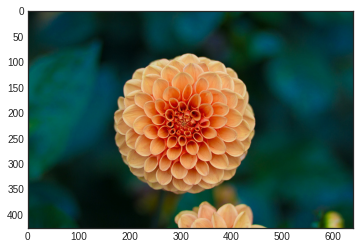

In [82]:
flower = load_sample_image('flower.jpg')/255
print(flower.dtype)
print(flower.shape)
plt.imshow(flower)
plt.show()

float64
(427, 640, 3)


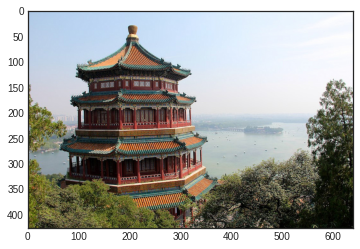

In [83]:
china = load_sample_image('china.jpg')/255
print(china.dtype)
print(china.shape)
plt.imshow(china)
plt.show()

In [84]:
images = np.array([china,flower])
batch_size,height,width,channels = images.shape
print(images.shape)

(2, 427, 640, 3)


In [85]:
filters=np.zeros(shape=(7,7,channels, 2), dtype=np.float32)
filters[:,3,:,0] =1
filters[3,:,:,1]=1
print(filters.shape)             

(7, 7, 3, 2)


In [86]:
conv=Conv2D(filters=16,kernel_size=3,activation='relu')

In [87]:
conv=Conv2D(filters=16,kernel_size=3, padding='same', strides=1, activation='relu')

In [88]:
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Conv2D

In [89]:
print(flower.shape)
flower=np.expand_dims(flower,axis=0)
print(flower.shape)

#max_pool=MaxPool2D(pool_size=2)
output=Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu')(flower)
output=MaxPool2D(pool_size=2)(output)
print(output.shape)

(427, 640, 3)
(1, 427, 640, 3)
(1, 213, 320, 32)


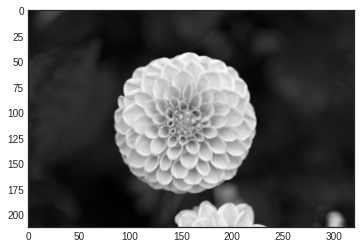

In [90]:
plt.imshow(output[0,:,:,8], cmap='gray')
plt.show()

In [91]:
from tensorflow.keras.layers import AvgPool2D

In [92]:
print(flower.shape)
output=Conv2D(filters=32,kernel_size=3, strides=1, padding='same', activation='relu')(flower)
output=AvgPool2D(pool_size=2)(output)
print(output.shape)

(1, 427, 640, 3)
(1, 213, 320, 32)


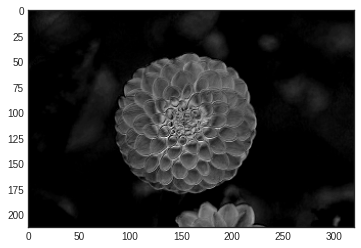

In [93]:
plt.imshow(output[0,:,:,2],cmap='gray')
plt.show()

In [94]:
from tensorflow.keras.layers import Dense

In [95]:
output_size=64

In [96]:
fc=Dense(units=output_size, activation='relu')

# LeNet(data--MNIST)

In [97]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from tensorflow.keras.datasets import mnist 

import numpy as np

In [98]:
(x_train, y_train),(x_test,y_test)=mnist.load_data()
x_train,x_test=x_train[..., np.newaxis], x_test[..., np.newaxis]

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(60000,)
(10000, 28, 28, 1)
(10000,)


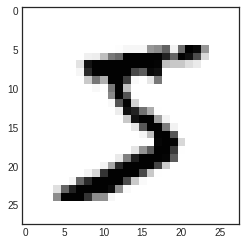

In [99]:
plt.imshow(x_train[0,:,:,0])

In [100]:
x_train, x_test=x_train/255.0, x_test/255.0

모델구성

In [101]:
num_classes =10
epochs=30
batch_size=32

In [102]:
class LeNet5(Model):
    def __init__(self, num_classes):
        super(LeNet5,self).__init__()
        self.conv1=Conv2D(6, kernel_size=(5,5), padding='same', activation='relu')
        self.conv2=Conv2D(16, kernel_size=(5,5), activation='relu')
        self.max_pool=MaxPool2D(pool_size=(2,2))
        self.flatten=Flatten()
        self.dense1=Dense(120, activation='relu')
        self.dense2=Dense(84, activation='relu')
        self.dense3=Dense(num_classes,activation='softmax')

    def call(self, input_data):
        x=self.max_pool(self.conv1(input_data))
        x=self.max_pool(self.conv2(x))
        x=self.flatten(x)
        x=self.dense3(self.dense2(self.dense1(x)))
        return x

In [103]:
model=LeNet5(num_classes)

In [104]:
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics='accuracy')

In [105]:
callbacks = {EarlyStopping(patience=3, monitor='val_loss'),
             TensorBoard(log_dir='./logs',histogram_freq=1)}

##model learning & valuation

In [106]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test,y_test), 
          callbacks=callbacks)

AttributeError: ignored